<a href="https://colab.research.google.com/github/cvillarr123/trading/blob/master/notebook/balance_v001_CVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/chrisconlan/algorithmic-trading-with-python.git


Cloning into 'algorithmic-trading-with-python'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 341 (delta 44), reused 312 (delta 24), pack-reused 0
Receiving objects: 100% (341/341), 4.83 MiB | 19.71 MiB/s, done.
Resolving deltas: 100% (44/44), done.


# Nueva sección

# Nueva sección

In [2]:
!pip install bt

     |████████████████████████████████| 2.7MB 4.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765284 sha256=eb353bd5823b04150b8c5aa12667afc788372619ed1850a78af3e107f3c11c60
  Stored in directory: /root/.cache/pip/wheels/18/2a/31/ead0e40a43116c3278ea50bdec622d43c9e51263b8a62ad71c
Successfully built bt


In [3]:
!pip install alpha_vantage

     |████████████████████████████████| 1.3MB 4.9MB/s 
     |████████████████████████████████| 296kB 13.4MB/s 
     |████████████████████████████████| 143kB 13.8MB/s 


In [4]:
!pip install alpha_vantage pandas

In [5]:
!pip install plotly==5.0.0

     |████████████████████████████████| 19.1MB 1.5MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [6]:
!pip install chart-studio

     |████████████████████████████████| 71kB 2.6MB/s 


In [7]:
!pip install numpy

In [8]:
!pip install numpy --upgrade

     |████████████████████████████████| 15.7MB 204kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [1]:
!pip uninstall pandas_ta

Uninstalling pandas-ta-0.3.2b0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_ta-0.3.2b0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_ta/*
Proceed (y/n)? y
  Successfully uninstalled pandas-ta-0.3.2b0


In [2]:
!pip install pandas_ta

Processing /root/.cache/pip/wheels/59/65/21/fd02b37d10cfa0562e63dd69a1fbaf24389520f4936ace11f7/pandas_ta-0.3.2b0-cp37-none-any.whl


In [3]:
%cd algorithmic-trading-with-python/src/

/content/algorithmic-trading-with-python/src


In [4]:
!ls

bootstrap_portfolio.py	       pypm
fit_alternative_data_model.py  simulate_alternative_data_portfolio.py
__init__.py		       simulate_portfolio.py
optimize_portfolio.py	       white_noise_portfolio.py


In [13]:
import sys
sys.path.insert(0, '/content/algorithmic-trading-with-python/src/pypm')

**Librerias a usar para graficas e indicadores**

In [36]:

import pypm
from pypm import metrics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
import datetime
import numpy as np
import plotly.graph_objs as go
import plotly as py

import pandas_ta as ta



import plotly.express as px
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#metrics.calculate_calmar_ratio

In [6]:
def line_range(df,x_col,y_col,range_x_values,title_msg, hide_weekends,especial_dates, hide_especial_dates) :
  df_trunc = df.copy()
  fig = px.line(df_trunc, x=x_col, y=y_col, range_x=range_x_values, title=title_msg)
  if (hide_weekends) :
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
        ]
    )
  else :
    if (hide_especial_dates) :
      fig.update_xaxes(
          rangebreaks=[
              dict(bounds=["sat", "mon"]), #, #hide weekends
              dict(values=especial_dates)  # hide Christmas and New Year's
          ]
      )
  fig.show()

In [7]:
def lines_plot(dfs,x_cols,y_cols,line_colors,title_msg, hide_weekends,especial_dates, hide_especial_dates) :


    layout = go.Layout(
        xaxis=dict(rangebreaks=[
            dict(bounds=["sat", "mon"])#, # hide weekends
            ],
        ),
        title=go.layout.Title(text=title_msg)   
    )

    fig = go.Figure()

    for i in range(len(x_cols)):
        print(i)
        print(x_cols[i])
        fig.add_trace(go.Scatter(x=dfs[x_cols[i]], y=dfs[y_cols[i]], mode='lines', name=x_cols[i] ,line=dict(color=line_colors[i]) ) )


    if (hide_weekends) :
      fig.update_xaxes(
          rangebreaks=[
              dict(bounds=["sat", "mon"]) #, #hide weekends
          ]
      )
    else :
      if (hide_especial_dates) :
        fig.update_xaxes(
            rangebreaks=[
                dict(bounds=["sat", "mon"]), #, #hide weekends
                dict(values=especial_dates)  # hide Christmas and New Year's
            ]
        )

    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
        ]
    )

    fig.show()

In [8]:
#para dibujar solo velas
def drawCandleStick(data):
    candlestick = go.Candlestick(
        x = data.index,
        open = data['open'],
        high = data['high'], 
        low = data['low'],
        close = data['close']
    )
    # create a plot
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
            #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
        ]
    )
    fig = go.Figure(data=[candlestick])
    fig.show()

In [9]:
fromD = 'GBP'
toD='AUD'
# **Ver el precio de intercambio al cierre**

from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='1035HSNE5D7XWHLM',output_format='pandas')

# There is no metadata in this call
data_exchange_rate, meta_exchange_rate = cc.get_currency_exchange_rate(from_currency=fromD,to_currency=toD)

#data_exchange_rate.head(5)




In [10]:
# para analisis diario
columns = ['open','high','low','close']

data_daily, meta_daily = cc.get_currency_exchange_daily ( 'GBP','AUD',outputsize='compact')

data_daily.columns = columns
data_daily.sort_index(ascending=True,inplace=True)
data_daily["TradeDate"] = data_daily.index.date
data_daily.TradeDate = pd.to_datetime(data_daily.TradeDate, format='%Y-%m-%d')

data_daily.reset_index(drop=True,inplace=True)
data_daily.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate    datetime64[ns]
dtype: object

In [11]:
data_daily.head()

,open,high,low,close,TradeDate
0,1.78608,1.79432,1.78523,1.79122,2021-02-16
1,1.79141,1.79666,1.78582,1.78744,2021-02-17
2,1.78628,1.80236,1.78473,1.79829,2021-02-18
3,1.79839,1.79941,1.77803,1.77938,2021-02-19
4,1.78028,1.78154,1.77545,1.77636,2021-02-22


In [12]:
titulo='Prices:' + fromD + '-' + toD

In [13]:
np.max(data_daily.TradeDate)

Timestamp('2021-07-05 00:00:00')

In [14]:
np.min(data_daily.TradeDate)

Timestamp('2021-02-16 00:00:00')

In [15]:

# para analisis mensual

data_monthly, meta_monthly = cc.get_currency_exchange_monthly('GBP','AUD',outputsize='compact')

In [16]:
data_monthly.columns = columns
data_monthly.sort_index(ascending=False,inplace=True)
data_monthly.head(5)

,open,high,low,close
date,,,,
2021-07-05,1.84273,1.84719,1.83346,1.83949
2021-06-30,1.83636,1.85237,1.81909,1.84274
2021-05-31,1.78958,1.84236,1.78024,1.83614
2021-04-30,1.81441,1.82650,1.77372,1.79078
2021-03-31,1.80520,1.81595,1.78057,1.81402


In [17]:
line_range(data_monthly,data_monthly.index,data_monthly.close,['2019-01-01','2021-07-02'],'Closes '+titulo,True,['2021-06-02'],False)

In [18]:

# Ver el intraday para el calculo de banderas

data_intraday, meta_intraday = cc.get_currency_exchange_intraday('GBP','AUD',interval='15min',outputsize='full')

data_intraday.columns = columns
data_intraday.sort_index(ascending=True,inplace=True)
data_intraday['TradeDate'] = data_intraday.index.date 


data_intraday['time'] = data_intraday.index.time
data_intraday["date"] = data_intraday.index.to_pydatetime()

format = '%Y-%m-%d %H:%M:%S'

data_intraday['date'] = pd.to_datetime(data_intraday.date, format=format)
data_intraday = data_intraday.set_index(pd.DatetimeIndex(data_intraday['date']))

data_daily.sort_index(ascending=True,inplace=True)

data_intraday.reset_index(drop=True,inplace=True)

#data_intraday.set_index('date',inplace=True)



data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.84291,1.84370,1.84159,1.84339,2021-06-20,22:15:00,2021-06-20 22:15:00
1,1.84338,1.84381,1.84295,1.84373,2021-06-20,22:30:00,2021-06-20 22:30:00
2,1.84366,1.84456,1.84254,1.84280,2021-06-20,22:45:00,2021-06-20 22:45:00
3,1.84276,1.84293,1.84124,1.84179,2021-06-20,23:00:00,2021-06-20 23:00:00
4,1.84183,1.84284,1.84121,1.84226,2021-06-20,23:15:00,2021-06-20 23:15:00
5,1.84222,1.84242,1.84149,1.84207,2021-06-20,23:30:00,2021-06-20 23:30:00
6,1.84207,1.84247,1.84133,1.84187,2021-06-20,23:45:00,2021-06-20 23:45:00
7,1.84181,1.84213,1.84108,1.84178,2021-06-21,00:00:00,2021-06-21 00:00:00
8,1.84173,1.84256,1.84064,1.84129,2021-06-21,00:15:00,2021-06-21 00:15:00
9,1.84130,1.84205,1.84072,1.84127,2021-06-21,00:30:00,2021-06-21 00:30:00


In [19]:
data_intraday.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate            object
time                 object
date         datetime64[ns]
dtype: object

In [20]:
data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.84291,1.84370,1.84159,1.84339,2021-06-20,22:15:00,2021-06-20 22:15:00
1,1.84338,1.84381,1.84295,1.84373,2021-06-20,22:30:00,2021-06-20 22:30:00
2,1.84366,1.84456,1.84254,1.84280,2021-06-20,22:45:00,2021-06-20 22:45:00
3,1.84276,1.84293,1.84124,1.84179,2021-06-20,23:00:00,2021-06-20 23:00:00
4,1.84183,1.84284,1.84121,1.84226,2021-06-20,23:15:00,2021-06-20 23:15:00
5,1.84222,1.84242,1.84149,1.84207,2021-06-20,23:30:00,2021-06-20 23:30:00
6,1.84207,1.84247,1.84133,1.84187,2021-06-20,23:45:00,2021-06-20 23:45:00
7,1.84181,1.84213,1.84108,1.84178,2021-06-21,00:00:00,2021-06-21 00:00:00
8,1.84173,1.84256,1.84064,1.84129,2021-06-21,00:15:00,2021-06-21 00:15:00
9,1.84130,1.84205,1.84072,1.84127,2021-06-21,00:30:00,2021-06-21 00:30:00


In [21]:
#omitir las fechas de fin de semana
data_intraday = data_intraday[data_intraday.date.dt.dayofweek < 5 ]

In [22]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201
2021-06-24,1.83301,1.84552
2021-06-25,1.82580,1.83605
2021-06-28,1.82874,1.83971
2021-06-29,1.83267,1.84394
2021-06-30,1.83796,1.84853
2021-07-01,1.83908,1.84719


In [23]:
pd_fechas_total = pd.date_range(start=data_intraday.TradeDate.min() , end= data_intraday.TradeDate.max())
type(pd_fechas_total)

pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
pd_fechas_total.to_list()

[Timestamp('2021-06-21 00:00:00', freq='D'),
 Timestamp('2021-06-22 00:00:00', freq='D'),
 Timestamp('2021-06-23 00:00:00', freq='D'),
 Timestamp('2021-06-24 00:00:00', freq='D'),
 Timestamp('2021-06-25 00:00:00', freq='D'),
 Timestamp('2021-06-26 00:00:00', freq='D'),
 Timestamp('2021-06-27 00:00:00', freq='D'),
 Timestamp('2021-06-28 00:00:00', freq='D'),
 Timestamp('2021-06-29 00:00:00', freq='D'),
 Timestamp('2021-06-30 00:00:00', freq='D'),
 Timestamp('2021-07-01 00:00:00', freq='D'),
 Timestamp('2021-07-02 00:00:00', freq='D'),
 Timestamp('2021-07-03 00:00:00', freq='D'),
 Timestamp('2021-07-04 00:00:00', freq='D'),
 Timestamp('2021-07-05 00:00:00', freq='D')]

In [25]:
data_intraday.TradeDate.unique()


array([datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 1), datetime.date(2021, 7, 2),
       datetime.date(2021, 7, 5)], dtype=object)

In [26]:

dt_breaks = [d for d in pd_fechas_total.to_list() if not d in data_intraday.TradeDate.unique()]

In [27]:
dt_breaks

[Timestamp('2021-06-26 00:00:00', freq='D'),
 Timestamp('2021-06-27 00:00:00', freq='D'),
 Timestamp('2021-07-03 00:00:00', freq='D'),
 Timestamp('2021-07-04 00:00:00', freq='D')]

In [28]:
data_intraday.dtypes
data_intraday.index

Int64Index([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
            ...
            965, 966, 967, 968, 969, 970, 971, 972, 973, 974],
           dtype='int64', length=954)

In [29]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201
2021-06-24,1.83301,1.84552
2021-06-25,1.82580,1.83605
2021-06-28,1.82874,1.83971
2021-06-29,1.83267,1.84394
2021-06-30,1.83796,1.84853
2021-07-01,1.83908,1.84719


In [30]:
# busca en que registro (fecha completa hora min seg) se dio el precio minimo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,TradeDate,time,date
17,1.83774,1.83822,1.83655,1.83793,2021-06-21,02:30:00,2021-06-21 02:30:00
190,1.84594,1.84743,1.84411,1.84562,2021-06-22,21:45:00,2021-06-22 21:45:00
261,1.84041,1.84122,1.83979,1.84093,2021-06-23,15:30:00,2021-06-23 15:30:00
344,1.83566,1.83578,1.83301,1.83419,2021-06-24,12:15:00,2021-06-24 12:15:00
445,1.82681,1.82792,1.82580,1.82769,2021-06-25,13:30:00,2021-06-25 13:30:00
491,1.83011,1.83025,1.82874,1.82935,2021-06-28,01:15:00,2021-06-28 01:15:00
588,1.83338,1.83381,1.83267,1.83324,2021-06-29,01:30:00,2021-06-29 01:30:00
707,1.83929,1.83992,1.83796,1.83896,2021-06-30,07:15:00,2021-06-30 07:15:00
815,1.83985,1.84210,1.83908,1.84200,2021-07-01,10:15:00,2021-07-01 10:15:00
954,1.83769,1.83817,1.83346,1.83565,2021-07-02,21:00:00,2021-07-02 21:00:00


In [31]:
# busca en que registro (fecha completa hora min seg) se dio el precio maximo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,TradeDate,time,date
70,1.84855,1.84955,1.84745,1.84818,2021-06-21,15:45:00,2021-06-21 15:45:00
115,1.85132,1.85237,1.85095,1.85193,2021-06-22,03:00:00,2021-06-22 03:00:00
231,1.85123,1.85201,1.85059,1.85064,2021-06-23,08:00:00,2021-06-23 08:00:00
333,1.84415,1.84552,1.84405,1.84455,2021-06-24,09:30:00,2021-06-24 09:30:00
399,1.83507,1.83605,1.83480,1.83581,2021-06-25,02:00:00,2021-06-25 02:00:00
544,1.83905,1.83971,1.83781,1.83817,2021-06-28,14:30:00,2021-06-28 14:30:00
662,1.84331,1.84394,1.84296,1.84377,2021-06-29,20:00:00,2021-06-29 20:00:00
721,1.84733,1.84853,1.84651,1.84697,2021-06-30,10:45:00,2021-06-30 10:45:00
801,1.84607,1.84719,1.84578,1.84659,2021-07-01,06:45:00,2021-07-01 06:45:00
908,1.84501,1.84710,1.84452,1.84679,2021-07-02,09:30:00,2021-07-02 09:30:00


In [37]:
# Calculate Returns and append to the df DataFrame
data_intraday.ta.log_return(cumulative=False, append=True,percent=True)
data_intraday.ta.percent_return(cumulative=False, append=True,percent=True)

# New Columns with results
data_intraday.columns

# Take a peek
data_intraday.head()



,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1
7,1.84181,1.84213,1.84108,1.84178,2021-06-21,00:00:00,2021-06-21 00:00:00,NaN,NaN,NaN
8,1.84173,1.84256,1.84064,1.84129,2021-06-21,00:15:00,2021-06-21 00:15:00,-0.026605,-0.000266,-0.000266
9,1.84130,1.84205,1.84072,1.84127,2021-06-21,00:30:00,2021-06-21 00:30:00,-0.001086,-0.000011,-0.000011
10,1.84128,1.84162,1.84008,1.84059,2021-06-21,00:45:00,2021-06-21 00:45:00,-0.036931,-0.000369,-0.000369
11,1.84060,1.84232,1.84033,1.84194,2021-06-21,01:00:00,2021-06-21 01:00:00,0.073346,0.000733,0.000733


In [38]:
data_intraday["close_return"] = metrics.calculate_return_series(data_intraday.close)*100
data_intraday["close_log_return"] = metrics.calculate_log_return_series(data_intraday.close)*100

In [39]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return
7,1.84181,1.84213,1.84108,1.84178,2021-06-21,00:00:00,2021-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN
8,1.84173,1.84256,1.84064,1.84129,2021-06-21,00:15:00,2021-06-21 00:15:00,-0.026605,-0.000266,-0.000266,-0.026605,-0.026608
9,1.84130,1.84205,1.84072,1.84127,2021-06-21,00:30:00,2021-06-21 00:30:00,-0.001086,-0.000011,-0.000011,-0.001086,-0.001086
10,1.84128,1.84162,1.84008,1.84059,2021-06-21,00:45:00,2021-06-21 00:45:00,-0.036931,-0.000369,-0.000369,-0.036931,-0.036938
11,1.84060,1.84232,1.84033,1.84194,2021-06-21,01:00:00,2021-06-21 01:00:00,0.073346,0.000733,0.000733,0.073346,0.073319


In [40]:
data_intraday['intra_return'] = data_intraday.close.pct_change()*100

In [41]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return
7,1.84181,1.84213,1.84108,1.84178,2021-06-21,00:00:00,2021-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN
8,1.84173,1.84256,1.84064,1.84129,2021-06-21,00:15:00,2021-06-21 00:15:00,-0.026605,-0.000266,-0.000266,-0.026605,-0.026608
9,1.84130,1.84205,1.84072,1.84127,2021-06-21,00:30:00,2021-06-21 00:30:00,-0.001086,-0.000011,-0.000011,-0.001086,-0.001086
10,1.84128,1.84162,1.84008,1.84059,2021-06-21,00:45:00,2021-06-21 00:45:00,-0.036931,-0.000369,-0.000369,-0.036931,-0.036938
11,1.84060,1.84232,1.84033,1.84194,2021-06-21,01:00:00,2021-06-21 01:00:00,0.073346,0.000733,0.000733,0.073346,0.073319


In [42]:


df_trunc = data_intraday.copy()

fig = px.line(df_trunc, x='date', y='intra_return', range_x=['2021-06-22', '2021-07-01'], title='Retorno Porcentual precios:'+fromD + '-' + toD)

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)
fig.show()




Ver la variabilidad a traves de un histograma del retorno porcentual del precio de cierre

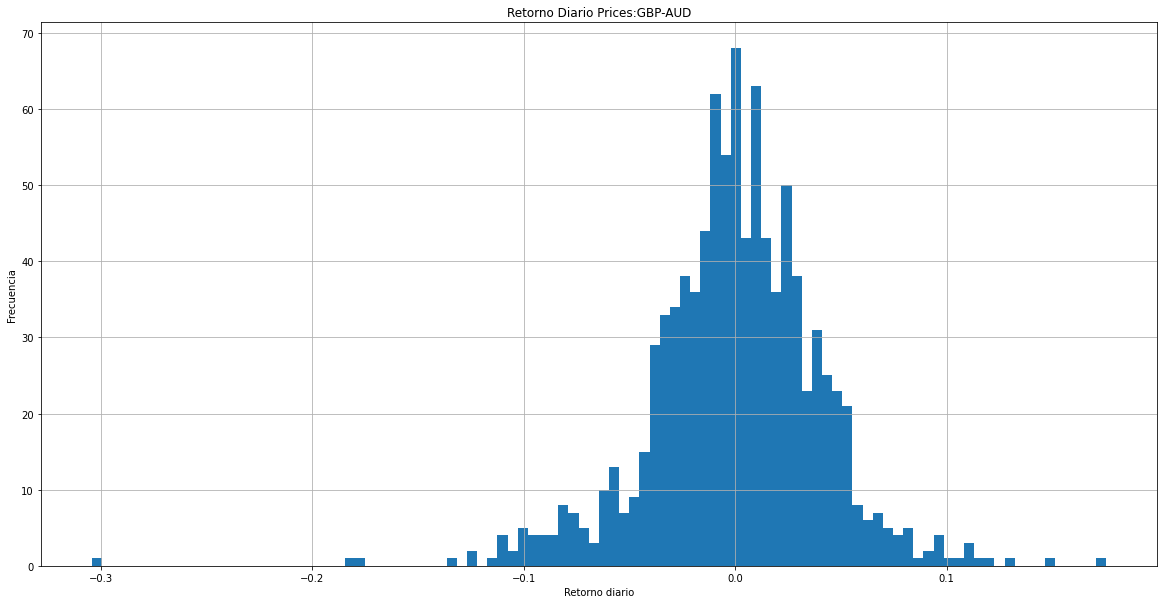

In [43]:
data_intraday['intra_return'].hist(bins=100)
plt.ylabel('Frecuencia')
plt.xlabel('Retorno diario')
plt.title('Retorno Diario '+titulo)
plt.show()

In [44]:
# si quisiera hacer un resample de intraday a dia
resample_diary = data_intraday.set_index('date').resample('D').mean()
resample_diary.head(5)
resample_weekly = data_intraday.set_index('date').resample('W').mean()
resample_weekly.head(5)


,open,high,low,close,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return
date,,,,,,,,,
2021-06-27,1.842150,1.842756,1.841233,1.842109,-0.001460,-0.000015,-0.000015,-0.001460,-0.001469
2021-07-04,1.840026,1.840619,1.839168,1.840016,0.000995,0.000010,0.000010,0.000995,0.000987
2021-07-11,1.839440,1.839941,1.838689,1.839458,0.010185,0.000102,0.000102,0.010185,0.010171


In [45]:
data_intraday['MVS50']=data_intraday['close'].rolling(window=50).mean()

In [46]:
#MVS30 = pd.DataFrame()
#MVS30['close']=market['close'].rolling(window=30).mean()
data_intraday['MVS30']=data_intraday['close'].rolling(window=30).mean()

In [47]:
#MVS30[MVS30.close.notna()].head()

In [48]:
#MVS100 = pd.DataFrame()
#MVS100['close']=market['close'].rolling(window=100).mean()
data_intraday['MVS100']=data_intraday['close'].rolling(window=100).mean()

In [49]:
data_intraday.head(2)


,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100
7,1.84181,1.84213,1.84108,1.84178,2021-06-21,00:00:00,2021-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.84173,1.84256,1.84064,1.84129,2021-06-21,00:15:00,2021-06-21 00:15:00,-0.026605,-0.000266,-0.000266,-0.026605,-0.026608,NaN,NaN,NaN


In [50]:
#def lines_plot(dfs,x_cols,y_cols,line_colors,title_msg, hide_weekends,especial_dates, hide_especial_dates) :

#x_columns_data = ['close','MVS30','MVS100']
#y_columns_data = ['date','date','date']
#line_colors = ['black','green','blue']
#lines_plot(data_intraday,x_columns_data,y_columns_data,line_colors,titulo,True,'2021-06-02',False)


In [51]:
# plt.figure()
# plt.plot(data_intraday['close'], label = 'Close Price GBP-AUD')
# plt.plot(data_intraday['MVS30'], label = 'Media Movil 30')
# plt.plot(data_intraday['MVS100'], label = 'Media Movil 100')
# plt.title('Precio de cierre '  )
# plt.xlabel( 'Fecha max' +  str( np.min(data_intraday.TradeDate) ) + str(np.max(data_intraday.TradeDate)  ))
# plt.ylabel('Close Price ($)')
# plt.legend(loc='upper left')
# plt.show()


In [52]:
str(np.min(data_daily.TradeDate) )

'2021-02-16 00:00:00'

In [53]:
str(np.max(data_daily.TradeDate) )


'2021-07-05 00:00:00'

In [54]:

data_intraday['MVS10'] = ta.sma(data_intraday["close"], length=10)
data_intraday.tail(6)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10
969,1.83907,1.83966,1.83876,1.83930,2021-07-05,01:00:00,2021-07-05 01:00:00,0.013594,0.000136,0.000136,0.013594,0.013593,1.839288,1.838572,1.841704,1.838366
970,1.83938,1.84033,1.83886,1.84019,2021-07-05,01:15:00,2021-07-05 01:15:00,0.048388,0.000484,0.000484,0.048388,0.048376,1.839266,1.838594,1.841681,1.838636
971,1.84026,1.84040,1.83820,1.83860,2021-07-05,01:30:00,2021-07-05 01:30:00,-0.086404,-0.000864,-0.000864,-0.086404,-0.086441,1.839220,1.838560,1.841642,1.838931
972,1.83860,1.83951,1.83825,1.83945,2021-07-05,01:45:00,2021-07-05 01:45:00,0.046231,0.000462,0.000462,0.046231,0.046220,1.839179,1.838527,1.841612,1.839114
973,1.83936,1.83991,1.83849,1.83919,2021-07-05,02:00:00,2021-07-05 02:00:00,-0.014135,-0.000141,-0.000141,-0.014135,-0.014136,1.839122,1.838484,1.841580,1.839271
974,1.83918,1.83984,1.83877,1.83949,2021-07-05,02:15:00,2021-07-05 02:15:00,0.016312,0.000163,0.000163,0.016312,0.016310,1.839079,1.838462,1.841547,1.839458


In [55]:

data_intraday['MVS50'] = ta.sma(data_intraday["close"], length=50)
data_intraday.tail(6)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10
969,1.83907,1.83966,1.83876,1.83930,2021-07-05,01:00:00,2021-07-05 01:00:00,0.013594,0.000136,0.000136,0.013594,0.013593,1.839288,1.838572,1.841704,1.838366
970,1.83938,1.84033,1.83886,1.84019,2021-07-05,01:15:00,2021-07-05 01:15:00,0.048388,0.000484,0.000484,0.048388,0.048376,1.839266,1.838594,1.841681,1.838636
971,1.84026,1.84040,1.83820,1.83860,2021-07-05,01:30:00,2021-07-05 01:30:00,-0.086404,-0.000864,-0.000864,-0.086404,-0.086441,1.839220,1.838560,1.841642,1.838931
972,1.83860,1.83951,1.83825,1.83945,2021-07-05,01:45:00,2021-07-05 01:45:00,0.046231,0.000462,0.000462,0.046231,0.046220,1.839179,1.838527,1.841612,1.839114
973,1.83936,1.83991,1.83849,1.83919,2021-07-05,02:00:00,2021-07-05 02:00:00,-0.014135,-0.000141,-0.000141,-0.014135,-0.014136,1.839122,1.838484,1.841580,1.839271
974,1.83918,1.83984,1.83877,1.83949,2021-07-05,02:15:00,2021-07-05 02:15:00,0.016312,0.000163,0.000163,0.016312,0.016310,1.839079,1.838462,1.841547,1.839458


In [81]:
data_intraday['EMA5'] = ta.ema(data_intraday["close"], length=5)
data_intraday.tail(6)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10,MVS14,PosibleCompra,PosibleVenta,TimeDate,EMA10,EMA50,EMA14,EMA5
969,1.83907,1.83966,1.83876,1.83930,2021-07-05,01:00:00,2021-07-05 01:00:00,0.013594,0.000136,0.000136,0.013594,0.013593,1.839288,1.838572,1.841704,1.838366,1.838160,NaN,NaN,969,1.838745,1.839521,1.838601,1.839135
970,1.83938,1.84033,1.83886,1.84019,2021-07-05,01:15:00,2021-07-05 01:15:00,0.048388,0.000484,0.000484,0.048388,0.048376,1.839266,1.838594,1.841681,1.838636,1.838325,NaN,NaN,970,1.839007,1.839548,1.838813,1.839487
971,1.84026,1.84040,1.83820,1.83860,2021-07-05,01:30:00,2021-07-05 01:30:00,-0.086404,-0.000864,-0.000864,-0.086404,-0.086441,1.839220,1.838560,1.841642,1.838931,1.838390,NaN,NaN,971,1.838933,1.839511,1.838784,1.839191
972,1.83860,1.83951,1.83825,1.83945,2021-07-05,01:45:00,2021-07-05 01:45:00,0.046231,0.000462,0.000462,0.046231,0.046220,1.839179,1.838527,1.841612,1.839114,1.838538,NaN,NaN,972,1.839027,1.839508,1.838873,1.839277
973,1.83936,1.83991,1.83849,1.83919,2021-07-05,02:00:00,2021-07-05 02:00:00,-0.014135,-0.000141,-0.000141,-0.014135,-0.014136,1.839122,1.838484,1.841580,1.839271,1.838649,NaN,NaN,973,1.839057,1.839496,1.838915,1.839248
974,1.83918,1.83984,1.83877,1.83949,2021-07-05,02:15:00,2021-07-05 02:15:00,0.016312,0.000163,0.000163,0.016312,0.016310,1.839079,1.838462,1.841547,1.839458,1.838792,NaN,NaN,974,1.839136,1.839495,1.838992,1.839329


In [82]:
data_intraday['EMA10'] = ta.ema(data_intraday["close"], length=10)
data_intraday.tail(6)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10,MVS14,PosibleCompra,PosibleVenta,TimeDate,EMA10,EMA50,EMA14,EMA5
969,1.83907,1.83966,1.83876,1.83930,2021-07-05,01:00:00,2021-07-05 01:00:00,0.013594,0.000136,0.000136,0.013594,0.013593,1.839288,1.838572,1.841704,1.838366,1.838160,NaN,NaN,969,1.838745,1.839521,1.838601,1.839135
970,1.83938,1.84033,1.83886,1.84019,2021-07-05,01:15:00,2021-07-05 01:15:00,0.048388,0.000484,0.000484,0.048388,0.048376,1.839266,1.838594,1.841681,1.838636,1.838325,NaN,NaN,970,1.839007,1.839548,1.838813,1.839487
971,1.84026,1.84040,1.83820,1.83860,2021-07-05,01:30:00,2021-07-05 01:30:00,-0.086404,-0.000864,-0.000864,-0.086404,-0.086441,1.839220,1.838560,1.841642,1.838931,1.838390,NaN,NaN,971,1.838933,1.839511,1.838784,1.839191
972,1.83860,1.83951,1.83825,1.83945,2021-07-05,01:45:00,2021-07-05 01:45:00,0.046231,0.000462,0.000462,0.046231,0.046220,1.839179,1.838527,1.841612,1.839114,1.838538,NaN,NaN,972,1.839027,1.839508,1.838873,1.839277
973,1.83936,1.83991,1.83849,1.83919,2021-07-05,02:00:00,2021-07-05 02:00:00,-0.014135,-0.000141,-0.000141,-0.014135,-0.014136,1.839122,1.838484,1.841580,1.839271,1.838649,NaN,NaN,973,1.839057,1.839496,1.838915,1.839248
974,1.83918,1.83984,1.83877,1.83949,2021-07-05,02:15:00,2021-07-05 02:15:00,0.016312,0.000163,0.000163,0.016312,0.016310,1.839079,1.838462,1.841547,1.839458,1.838792,NaN,NaN,974,1.839136,1.839495,1.838992,1.839329


In [56]:

data_intraday['MVS14'] = ta.sma(data_intraday["close"], length=14)
data_intraday.tail(6)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10,MVS14
969,1.83907,1.83966,1.83876,1.83930,2021-07-05,01:00:00,2021-07-05 01:00:00,0.013594,0.000136,0.000136,0.013594,0.013593,1.839288,1.838572,1.841704,1.838366,1.838160
970,1.83938,1.84033,1.83886,1.84019,2021-07-05,01:15:00,2021-07-05 01:15:00,0.048388,0.000484,0.000484,0.048388,0.048376,1.839266,1.838594,1.841681,1.838636,1.838325
971,1.84026,1.84040,1.83820,1.83860,2021-07-05,01:30:00,2021-07-05 01:30:00,-0.086404,-0.000864,-0.000864,-0.086404,-0.086441,1.839220,1.838560,1.841642,1.838931,1.838390
972,1.83860,1.83951,1.83825,1.83945,2021-07-05,01:45:00,2021-07-05 01:45:00,0.046231,0.000462,0.000462,0.046231,0.046220,1.839179,1.838527,1.841612,1.839114,1.838538
973,1.83936,1.83991,1.83849,1.83919,2021-07-05,02:00:00,2021-07-05 02:00:00,-0.014135,-0.000141,-0.000141,-0.014135,-0.014136,1.839122,1.838484,1.841580,1.839271,1.838649
974,1.83918,1.83984,1.83877,1.83949,2021-07-05,02:15:00,2021-07-05 02:15:00,0.016312,0.000163,0.000163,0.016312,0.016310,1.839079,1.838462,1.841547,1.839458,1.838792


In [83]:
def senal(data, columna_analisis1, columna_analisis2):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data[columna_analisis1][dia] > data[columna_analisis2][dia]:
            if condicion != 1:
                compra.append(data['close'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data[columna_analisis1][dia] < data[columna_analisis2][dia]:
            if condicion != -1:
                venta.append(data['close'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)

In [58]:
senales = senal(data_intraday.set_index('date'),'MVS30','MVS100')
data_intraday['PosibleCompra'] = senales[0]
data_intraday['PosibleVenta'] = senales[1]
data_intraday[data_intraday.MVS100.notna()].head(3)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10,MVS14,PosibleCompra,PosibleVenta
106,1.84844,1.84911,1.84770,1.84908,2021-06-22,00:45:00,2021-06-22 00:45:00,0.034624,0.000346,0.000346,0.034624,0.034618,1.847693,1.847624,1.845457,1.847685,1.847781,1.84908,NaN
107,1.84908,1.84932,1.84805,1.84853,2021-06-22,01:00:00,2021-06-22 01:00:00,-0.029745,-0.000297,-0.000297,-0.029745,-0.029749,1.847744,1.847667,1.845525,1.847849,1.847781,NaN,NaN
108,1.84850,1.84899,1.84782,1.84841,2021-06-22,01:15:00,2021-06-22 01:15:00,-0.006492,-0.000065,-0.000065,-0.006492,-0.006492,1.847772,1.847689,1.845596,1.847951,1.847794,NaN,NaN


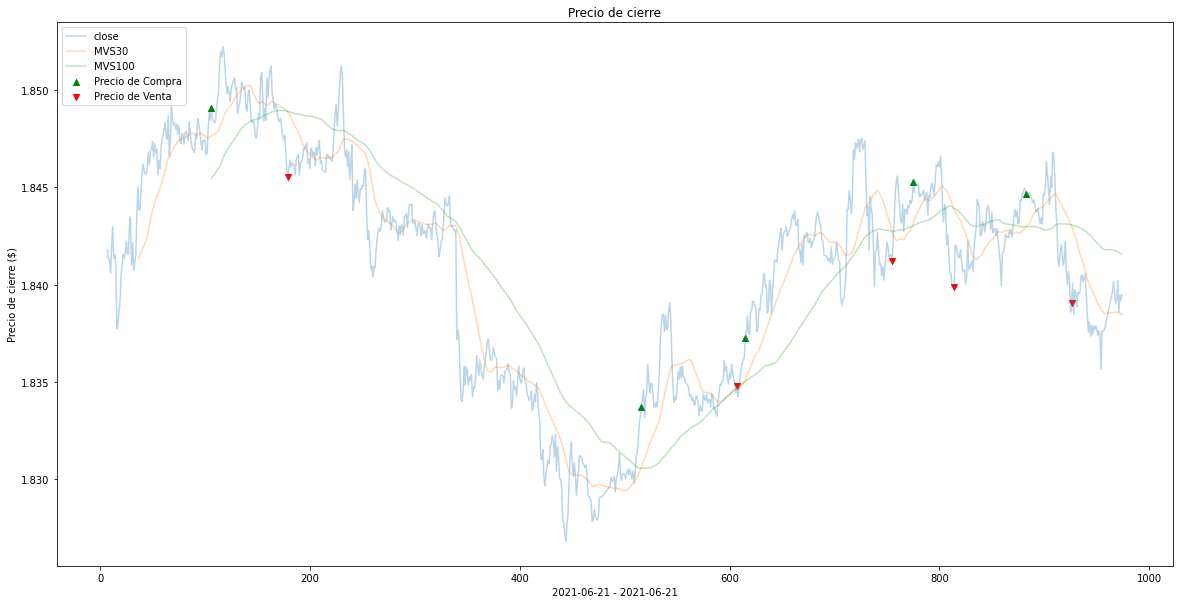

In [59]:
plt.figure()
plt.plot(data_intraday['close'], label = 'close', alpha = 0.3)
plt.plot(data_intraday['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data_intraday['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data_intraday.index, data_intraday['PosibleCompra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data_intraday.index, data_intraday['PosibleVenta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Precio de cierre')
plt.xlabel( str(np.min(data_intraday.TradeDate) ) + ' - ' +  str(np.min(data_intraday.TradeDate) ))
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [60]:
senales = senal(data_intraday.set_index('date'),'MVS10','MVS50')
data_intraday['PosibleCompra'] = senales[0]
data_intraday['PosibleVenta'] = senales[1]
data_intraday[data_intraday.MVS100.notna()].head(3)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10,MVS14,PosibleCompra,PosibleVenta
106,1.84844,1.84911,1.84770,1.84908,2021-06-22,00:45:00,2021-06-22 00:45:00,0.034624,0.000346,0.000346,0.034624,0.034618,1.847693,1.847624,1.845457,1.847685,1.847781,NaN,NaN
107,1.84908,1.84932,1.84805,1.84853,2021-06-22,01:00:00,2021-06-22 01:00:00,-0.029745,-0.000297,-0.000297,-0.029745,-0.029749,1.847744,1.847667,1.845525,1.847849,1.847781,1.84853,NaN
108,1.84850,1.84899,1.84782,1.84841,2021-06-22,01:15:00,2021-06-22 01:15:00,-0.006492,-0.000065,-0.000065,-0.006492,-0.006492,1.847772,1.847689,1.845596,1.847951,1.847794,NaN,NaN


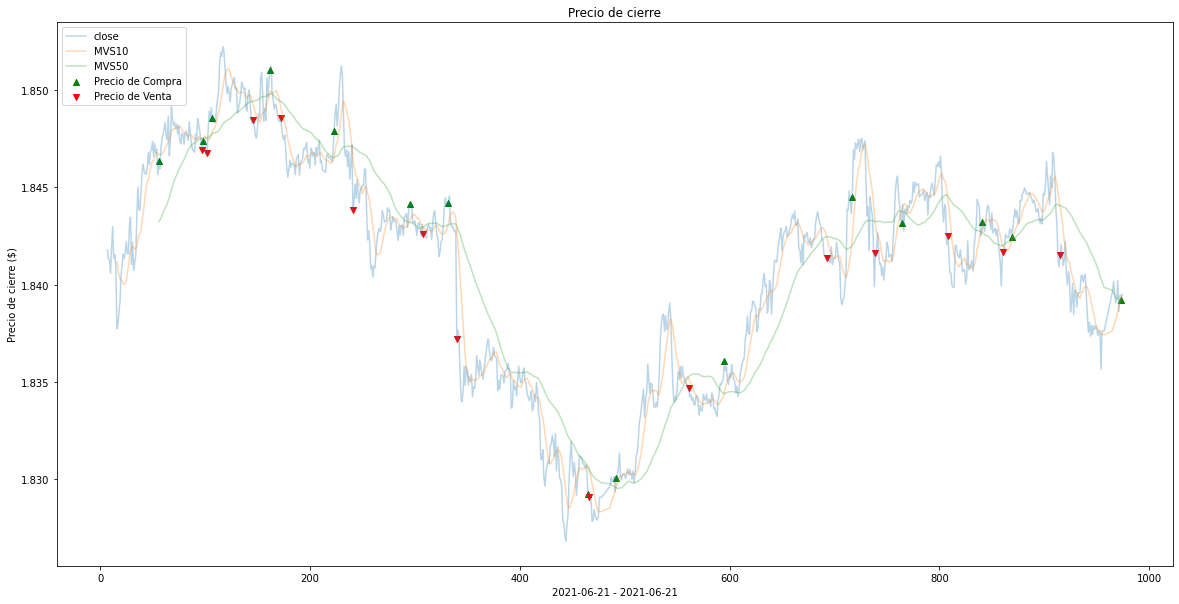

In [61]:
plt.figure()
plt.plot(data_intraday['close'], label = 'close', alpha = 0.3)
plt.plot(data_intraday['MVS10'], label = 'MVS10', alpha = 0.3)
plt.plot(data_intraday['MVS50'], label = 'MVS50', alpha = 0.3)
plt.scatter(data_intraday.index, data_intraday['PosibleCompra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data_intraday.index, data_intraday['PosibleVenta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Precio de cierre')
plt.xlabel( str(np.min(data_intraday.TradeDate) ) + ' - ' +  str(np.min(data_intraday.TradeDate) ))
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [62]:
df_trunc = data_intraday.copy()
layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text='Estrategia simple' + titulo)   
)



fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.close, mode='lines',  name='Close Price',line=dict(color='grey')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS10, mode='lines',  name='MVS10',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS50, mode='lines',  name='MVS50',line=dict(color='red')))

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.PosibleCompra, mode='markers',marker =dict(
            color='green',
            size=10,
            symbol=[5]
            ),  name='PosibleCompra',line=dict(color='green')))

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.PosibleVenta, mode='markers', marker =dict(
            color='red',
            size=10,
            symbol=[6]
            ), name='PosibleVenta',line=dict(color='red')))



fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()

In [84]:
senales = senal(data_intraday.set_index('date'),'EMA5','EMA10')
data_intraday['PosibleCompra'] = senales[0]
data_intraday['PosibleVenta'] = senales[1]
data_intraday[data_intraday.MVS100.notna()].head(3)

,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10,MVS14,PosibleCompra,PosibleVenta,TimeDate,EMA10,EMA50,EMA14,EMA5
106,1.84844,1.84911,1.84770,1.84908,2021-06-22,00:45:00,2021-06-22 00:45:00,0.034624,0.000346,0.000346,0.034624,0.034618,1.847693,1.847624,1.845457,1.847685,1.847781,NaN,NaN,106,1.848017,1.847106,1.847889,1.848392
107,1.84908,1.84932,1.84805,1.84853,2021-06-22,01:00:00,2021-06-22 01:00:00,-0.029745,-0.000297,-0.000297,-0.029745,-0.029749,1.847744,1.847667,1.845525,1.847849,1.847781,NaN,NaN,107,1.848111,1.847162,1.847974,1.848438
108,1.84850,1.84899,1.84782,1.84841,2021-06-22,01:15:00,2021-06-22 01:15:00,-0.006492,-0.000065,-0.000065,-0.006492,-0.006492,1.847772,1.847689,1.845596,1.847951,1.847794,NaN,NaN,108,1.848165,1.847211,1.848033,1.848429


In [89]:
df_trunc = data_intraday.copy()
layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text='Estrategia simple' + titulo)   
)



fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.close, mode='lines',  name='Close Price',line=dict(color='grey')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.EMA5, mode='lines',  name='EMA5',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.EMA10, mode='lines',  name='EMA10',line=dict(color='red')))

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.PosibleCompra, mode='markers',marker =dict(
            color='green',
            size=10,
            symbol=[5]
            ),  name='PosibleCompra',line=dict(color='green')))

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.PosibleVenta, mode='markers', marker =dict(
            color='red',
            size=10,
            symbol=[6]
            ), name='PosibleVenta',line=dict(color='red')))



fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()

In [63]:
def bbands(price, window_size=10, num_of_std=5):
    rolling_mean = price.rolling(window=window_size).mean()
    rolling_std  = price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)
    return rolling_mean, upper_band, lower_band

bb_avg, bb_upper, bb_lower = bbands(data_intraday.close)

In [64]:
df_trunc = data_intraday.copy()
layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text="Bandas Bollinger " + titulo)   
)



fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.close, mode='lines',  name='Close Price',line=dict(color='grey')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_avg, mode='lines',  name='bb_avg',line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_upper, mode='lines',  name='bb_upper',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_lower, mode='lines',  name='bb_lower',line=dict(color='red')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()

GRAFICO DE VELAS Y BANDAS DE BOLLINGER

In [65]:
df_trunc = data_intraday.copy()
layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text="Bandas Bollinger " + titulo)   
)

trace = go.Candlestick(x=df_trunc.date, open=df_trunc.open, high=df_trunc.high, low=df_trunc.low, close=df_trunc.close,
                       name=titulo)

data = [trace]

fig = go.Figure(data=data,layout=layout)



fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_avg, mode='lines',  name='bb_avg',line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_upper, mode='lines',  name='bb_upper',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_lower, mode='lines',  name='bb_lower',line=dict(color='red')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()

In [66]:
import chart_studio as ch

In [67]:
data_intraday["TimeDate"] = data_intraday.index
data_intraday.head(2)


,open,high,low,close,TradeDate,time,date,intra_return,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS50,MVS30,MVS100,MVS10,MVS14,PosibleCompra,PosibleVenta,TimeDate
7,1.84181,1.84213,1.84108,1.84178,2021-06-21,00:00:00,2021-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
8,1.84173,1.84256,1.84064,1.84129,2021-06-21,00:15:00,2021-06-21 00:15:00,-0.026605,-0.000266,-0.000266,-0.026605,-0.026608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [68]:


df_long=pd.melt(data_intraday, id_vars=['TimeDate','date'], value_vars=['MVS30', 'MVS100'])


df_long.head(3)

,TimeDate,date,variable,value
0,7,2021-06-21 00:00:00,MVS30,NaN
1,8,2021-06-21 00:15:00,MVS30,NaN
2,9,2021-06-21 00:30:00,MVS30,NaN


PARA IMPRIMIR VELAS SIN EL RANGO DE FECHAS DE FIN DE SEMANA

In [69]:

layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text="Grafico Medias Moviles 30 y 100")   
)

trace = go.Candlestick(x=df_trunc.date, open=df_trunc.open, high=df_trunc.high, low=df_trunc.low, close=df_trunc.close,
                       name=titulo)

data = [trace]

fig = go.Figure(data=data,layout=layout)

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS30, mode='lines',  name='MVS30',line=dict(color='black')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS100, mode='lines',  name='MVS100',line=dict(color='blue')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()
#py.offline.plot(fig, filename='USDCAD.html')

In [70]:
#para evaluar activos

# # Download historical prices
# bt_data = bt.get('fb, amzn, goog, nflx, aapl',
               # start='2020-6-1', end='2020-12-1')
# # Print the top five rows
# print(bt_data.head())
# # Define the strategy
# bt_strategy = bt.Strategy('Trade_Weekly', 
                         # [bt.algos.RunWeekly(),
                          # bt.algos.SelectAll(),
                          # bt.algos.WeighEqually(),
                          # bt.algos.Rebalance()])
# # Create a backtest
# bt_test = bt.Backtest(bt_strategy, bt_data)
# # Run the backtest
# bt_res = bt.run(bt_test)
# # Plot the test result
# bt_res.plot(title="Backtest result")
# plt.show()

In [71]:
# # Calculate 12-day EMA
# stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# # Calculate 26-day EMA
# stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

# # Plot the EMAs with price
# plt.plot(stock_data['EMA_12'], label='EMA_12')
# plt.plot(stock_data['EMA_26'], label='EMA_26')
# plt.plot(stock_data['Close'], label='Close')

# # Customize and show the plot
# plt.legend()
# plt.title('EMAs')
# plt.show()